In [1]:
# Imported libraries used for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# loads csv file as a pandas dataframe
Telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


**The following cells are used to describe the dataframe and its datapoints.**

In [3]:
# Describes dataset columns
Telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
# Displays the first 10 rows of the Telco_data dataframe.
Telco_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


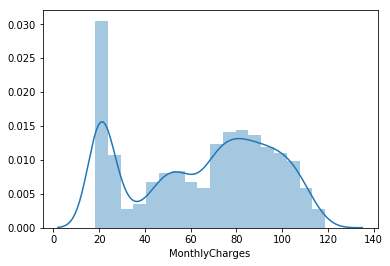

In [5]:
# Creates distribution plots of numerical features in the Telco_data dataframe.
distributions = Telco_data.select_dtypes([np.int, np.float])
for i, col in enumerate(distributions.columns):
    plt.figure(i)
    sns.distplot(distributions[col])



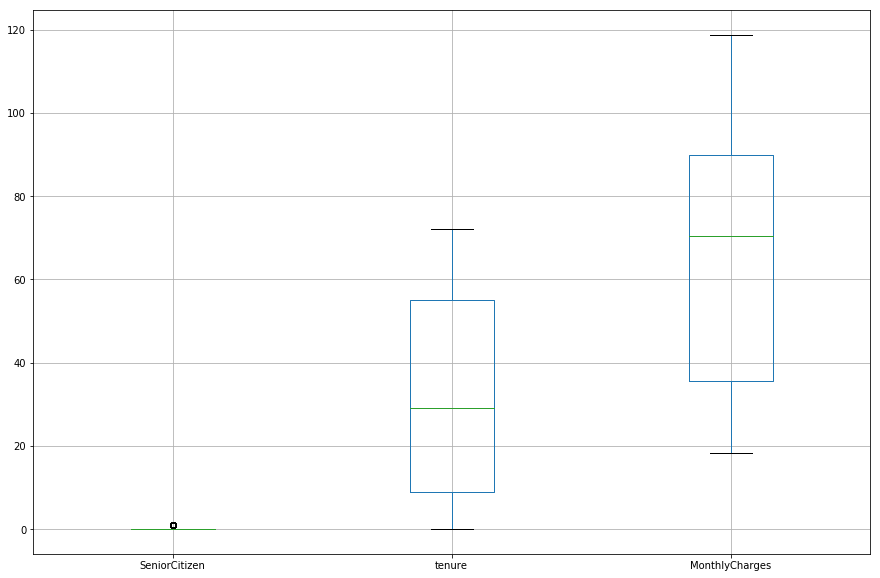

In [6]:
# A boxplot is made of each numerical feature in the Teclo_data dataframe to identify median and outlier values
Telco_data.boxplot(figsize=(15,10))

**Cleaning The Dataframe**


In [7]:
# Changes 'TotalCharges' series from object to float format
Telco_data['TotalCharges'] = pd.to_numeric(Telco_data['TotalCharges'], errors='coerce')
Telco_data['TotalCharges'].dtypes

dtype('float64')

In [8]:
# Searches dataframe for any missing or null values. The count returned is 11
Telco_data.isnull().sum().sum()

11

In [9]:
# Drops rows in Telco_data dataframe with null values
Telco_data = Telco_data.dropna(how='any',axis=0) 

In [10]:
# Searches dataframe for any missing or null values. The count returned is now 0
Telco_data.isnull().sum().sum()

0

In [11]:
# Removes the "CustomerID" column from dataframe

del Telco_data['customerID']


**The cells below contain the exploratory analysis of sales_data**

Text(0, 0.5, 'Tenure')

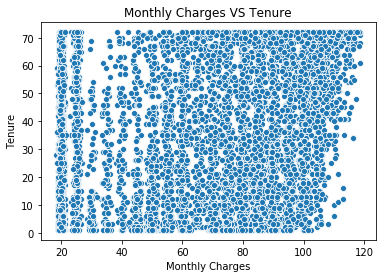

In [12]:
# Scatter plot of monthly charges vs tenure(months) 
sns.scatterplot(Telco_data['MonthlyCharges'],Telco_data['tenure'])
plt.title('Monthly Charges VS Tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


In [13]:
#Creates a new dataframe from non-senior Telco_data
#nonsenior_df = Telco_data[Telco_data.SeniorCitizen == 0]
#sns.boxplot(nonsenior_df['Contract'],nonsenior_df['MonthlyCharges'])

Text(0.5, 1.0, 'Customer Dependents in Household')

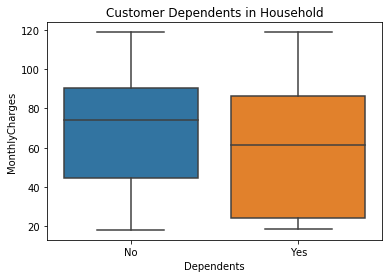

In [14]:
# Boxplot showing whether or not the customer has any dependents in the household
sns.boxplot(Telco_data['Dependents'],Telco_data['MonthlyCharges'])
plt.title('Customer Dependents in Household')


Text(0, 0.5, 'Monthly charges')

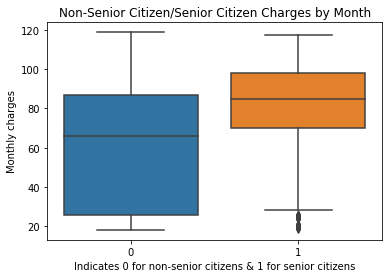

In [15]:
# Boxplot of non-senior citizens(0)/senior citizens(1) vs monthly charges
sns.boxplot(Telco_data['SeniorCitizen'],Telco_data['MonthlyCharges'])
plt.title('Non-Senior Citizen/Senior Citizen Charges by Month')
plt.xlabel('Indicates 0 for non-senior citizens & 1 for senior citizens')
plt.ylabel('Monthly charges')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0, 'Electronic check'),
 Text(0, 0, 'Mailed check'),
 Text(0, 0, 'Bank transfer (automatic)'),
 Text(0, 0, 'Credit card (automatic)')]

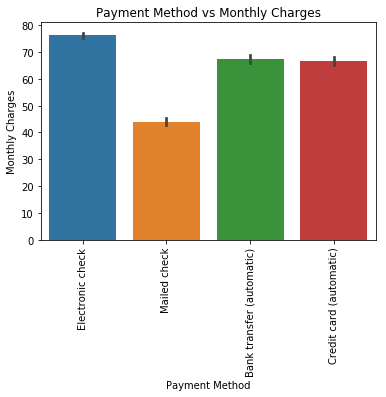

In [16]:
# Barplot of payment methods vs monthly charges
chart = sns.barplot(Telco_data['PaymentMethod'],Telco_data['MonthlyCharges'])
plt.title('Payment Method vs Monthly Charges')
plt.xlabel('Payment Method')
plt.ylabel('Monthly Charges')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Text(0, 0.5, 'Monthly Charges')

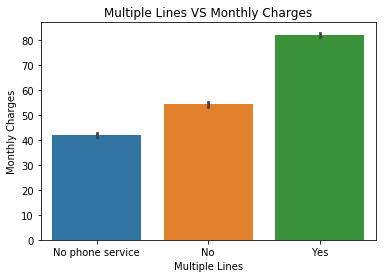

In [17]:
# Barplot of multiple lines vs monthly charges
sns.barplot(Telco_data['MultipleLines'],Telco_data['MonthlyCharges'])
plt.title('Multiple Lines VS Monthly Charges')
plt.xlabel('Multiple Lines')
plt.ylabel('Monthly Charges')

Text(0, 0.5, 'Monthly Charges')

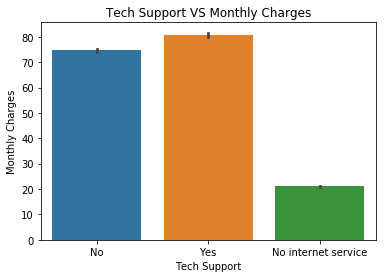

In [18]:
# Barplot indicating whether or not the customer has tech support vs monthly charges
sns.barplot(Telco_data['TechSupport'],Telco_data['MonthlyCharges'])
plt.title('Tech Support VS Monthly Charges')
plt.xlabel('Tech Support')
plt.ylabel('Monthly Charges')

Text(0, 0.5, 'Point Percentage of Seniors')

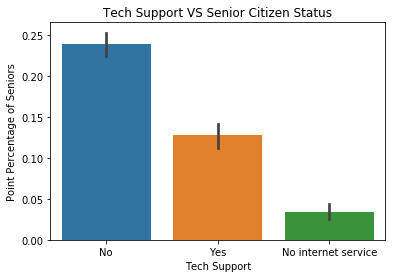

In [19]:
# Barplot that shows whether or not senior citizens have tech support
sns.barplot(Telco_data['TechSupport'],Telco_data['SeniorCitizen'])
plt.title('Tech Support VS Senior Citizen Status')
plt.xlabel('Tech Support')
plt.ylabel('Point Percentage of Seniors')

Text(0, 0.5, 'Point Percentage of Seniors')

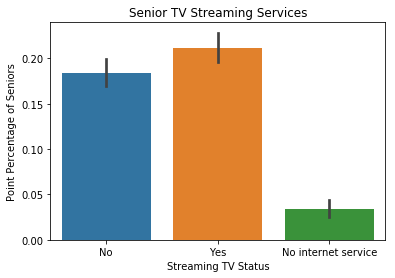

In [20]:
# Barplot that indicates the point percentage of senior citizens who have tv streaming services
sns.barplot(Telco_data['StreamingTV'],Telco_data['SeniorCitizen'])
plt.title('Senior TV Streaming Services')
plt.xlabel('Streaming TV Status')
plt.ylabel('Point Percentage of Seniors')

Text(0, 0.5, 'Point Percentage of Seniors')

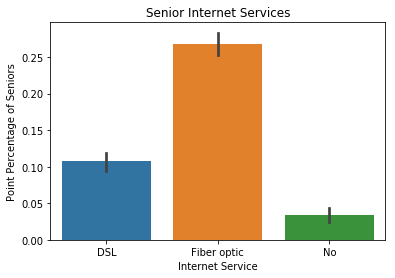

In [21]:
# Barplot that displays the point percentage of seniors who have internet service through Telco
sns.barplot(Telco_data['InternetService'],Telco_data['SeniorCitizen'])
plt.title('Senior Internet Services')
plt.xlabel('Internet Service')
plt.ylabel('Point Percentage of Seniors')

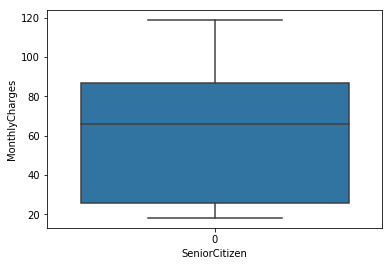

In [22]:
# Original Telco_data split into 2 data frames each having non-senior or senior field values
nonsenior_df = Telco_data[Telco_data.SeniorCitizen == 0]
senior_df = Telco_data[Telco_data.SeniorCitizen == 1]
sns.boxplot(nonsenior_df['SeniorCitizen'],nonsenior_df['MonthlyCharges'])

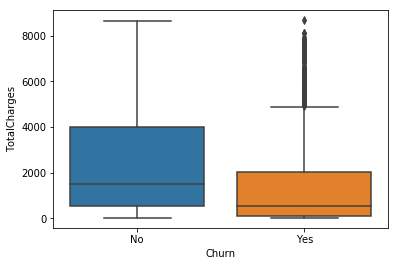

In [23]:
# Boxplot of non-seniors who have churned based on total spend
sns.boxplot(nonsenior_df['Churn'],nonsenior_df['TotalCharges'])

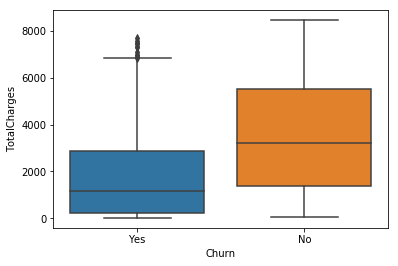

In [24]:
# Boxplot of seniors who have churned based on total spend
sns.boxplot(senior_df['Churn'],senior_df['TotalCharges'])

**Hypothesis Testing**

The purpose of this..

In [25]:
# The code below preforms a 2 sample t-test against senior monthly charges and non-senior monthly charges
# Null Hypothesis: There is no difference in total charges between the senior and non-senior groups
# Alternative Hypothesis: There is a difference in total charges between the senior and non-senior groups
ttest_ind(senior_df['TotalCharges'], nonsenior_df['TotalCharges'])


Ttest_indResult(statistic=8.632012257859719, pvalue=7.372387284007022e-18)

The pvalue is 7.37e-18 which is below the 0.05 cutoff value in this case we would reject the null hypothesis. There is a difference not due to chance between how much seniors and non-seniors pay each month.

In [26]:
# The code below preforms a 2 sample t-test against senior tenure and non-senior tenure
# Null Hypothesis: There is no difference in tenure between the senior and non-senior groups
# Alternative Hypothesis: There is a difference in tenure between the senior and non-senior groups
ttest_ind(senior_df['tenure'], nonsenior_df['tenure'])

Ttest_indResult(statistic=1.3151446202522086, pvalue=0.18850419765308563)

The pvalue is 0.1885 which is above the 0.05 cutoff value in this case we would fail to reject the null hypothesis. There is no difference between tenure of the senior and non-senior groups.

**Summary of Findings**

1. Monthly cost increases as tenure increases
2. Having a month to month contract is more expensive than signing a one or two year contract
3. Customers without dependents in their household pay more than those with dependents
4. Senior citizens pay more as a group monthly than non-senior citizens
5. A quarter of senior citizens don’t utilize Telcom’s tech support. Customers who utilize tech support tend to spend slightly more on monthly services and don’t cancel services as often
6. Nearly a quarter of senior citizens don’t use the tv or movie streaming services provided by Telcom, however over 25% have fiber optic high speed internet provided by Telcom
7. Both seniors and non-seniors are likely to cancel their Telcom services before spending more than $1,500 total on Telcom services.

**Suggestions**

Customers with dependents represent an opportunity to upsell additional services. A marketing outreach to this segment may be warranted. Since customers tend to spend more on services over time this effect could be amplified in households with dependents after conducting a marketing campaign to reach those individuals. A marketing campaign to reach out to senior citizens will improve Telcom’s churn rate for this group by assisting them with their technological needs while also informing that group of additional services Telcom offers. Providing customer service is highly crucial to customers who have spent less than $1500 on Telcom’s services. During this spending period service cancelation is highly probable. With continued customer support during this period customer churn can be greatly reduced. 

